# COMP90014 Assignment 1
### Semester 2, 2020

This assignment should be completed by each student individually. Make sure you read this entire document, and ask for help if anything is not clear. Any changes or clarification to this document will be announced via Canvas.

Please make sure you are aware of the University's rules on academic honesty and plagiarism, which are very strict: https://academichonesty.unimelb.edu.au/ 

Make sure you **do not** copy any code either from other students or from the internet. This is considered plagiarism. It is generally a good idea to avoid looking at any solutions as you may find it surprisingly difficult to generate your own solution to the problem once you have seen somebody else's.

Your completed notebook file containing all your answers will be turned in via Canvas. No other files or formats will be accepted - only upload the completed `.ipynb` file.

### Overview
To complete the assignment you will need to finish the tasks in this notebook. There are multiple tasks that are connected in a logical order.

The tasks are a combination of writing your own implementations of algorithms we've discussed in lectures, writing your own code to use library implementations of these algorithms and interpreting the results in short answer format. Each short answer question has a word limit that will be strictly enforced!

In some case, we have provided test input and test output that you can use to try out your solutions. These tests are just samples and are not exhaustive - they may warn you if you've made a mistake, but they are not guaranteed to. It's up to you to decide whether your code is correct.

### Marking

Cells that must be completed to receive marks are clearly labeled. There are 16 graded cells, some of which are code cells, in which you must complete the code to solve a problem, and some of which are markdown cells, in which you must write your answers to short-answer questions. In order to get full marks, your code needs to be clear, unambiguous, with adequate comments. **Code style, readability and efficiency** will be taken into consideration. 

The total marks for the assignment add up to 45, and it will be worth 15% of your overall subject grade.

### Background and data
During this assignment we will analyse the relationship between 17 organisms. 
Understanding the genetic and evolutionary relationship between organisms is an important task which is at the core of bioinformatics. 
This type of phylogenetic analysis can be performed by comparing the sequence differences of a particular gene between the organisms.
All organisms must possess the gene in question for comparison to be possible.  

As all organisms possess genes to make ribosomes, these will be used in this assignment.
A 100bp segment of the small ribosomal subunit gene has been extracted from each of these 17 organisms, and will act as our sequences for comparison.

In the first section, we will calculate distances between these organisms and visualise.
In the second section, we will use clustering algorithms to group organisms.

At each step of the process you will be asked to fill out short answer questions to demonstrate your understanding of the concepts.

### Package installs
If you are using jupyter lab online, all packages will be available. If you are running this on your local computer, you may need to install some packages. Run the cell below if using jupyter lab locally. 

In [1]:
!pip install numpy
!pip install scipy
!pip install pandas
!pip install scikit-learn
!pip install seaborn

### Importing data
To begin, we need to understand the data.
The ribosome genes are available in a .fasta file called 'ribosome_genes.fasta'. You can have a look if you like.
These genes will be imported as classes (RibosomeGene). 

Each RibosomeGene object has a name, accession, sequence and length.
You can access these properties using '.' syntax. (see below). 

Try to think of each gene as something physical, rather than code.
In real life, each gene has a .length, its organism has a .name, and it has a .sequence. We can write code in this way too. 

we will import these into **ribosome_genes**, which is a list of our genes.

In [2]:
import warnings
warnings.filterwarnings('ignore')

from utilities import import_16s_sequences
ribosome_genes = import_16s_sequences()

In [3]:
print('{:<20}{:<30}{:<15}{:<10}'.format('gene.accession', 'gene.name', 'gene.length', 'gene.sequence'))
for gene in ribosome_genes:
    print('{:<20}{:<30}{:<15}{:<10}'.format(gene.accession, gene.name[:27], gene.length, gene.sequence[:8] + '...'))

gene.accession      gene.name                     gene.length    gene.sequence
EC_A                Escherichia coli DP101        100            CCUUCGGG...
EC_B                Escherichia coli BEBOP        100            CCUUCGGG...
EC_C                Escherichia coli SAMURAI_CH   100            CCUUCGGG...
EC_D                Escherichia coli SAO          100            CCUUCGGG...
EC_E                Escherichia coli code_GEASS   100            CCUUCGGG...
EC_F                Escherichia coli DEATHNOTE    100            CCUUCGGG...
EC_G                Escherichia coli STEINS_GAT   100            CCUUCGGG...
EF_A                Enterococcus faecalis ATCC    100            CCUUUUUG...
EF_B                Enterococcus faecalis EnGen   100            CCUUUUUG...
EF_C                Enterococcus faecalis ATCC    100            CCUUUUUG...
EF_D                Enterococcus faecalis GAH94   100            CCUUUUUG...
HS_A                Homo sapiens (barack obamas   100            CCCGCCGG.

### SECTION 1: PAIRWISE DISTANCES
To be able to compare organisms via their sequences, we need a way to measure their difference as a distance. 

**TASK 1: K-mer distance**<br>
The kmer distance between two sequences is defined here as the total number of k-mers that are unique to either sequence.<br>
eg: If seq1 has 3 unique kmers not found in seq2 (copy number difference also matters), and seq2 has 2 unique kmers, the kmer distance in this assignment is 5.  
<br>Write a function that calculates a dictionary of k-mers (for k = any number) and their counts for each gene sequence.

In [4]:
# -- GRADED CELL (1 mark) - complete this cell --

def create_kmer_dictionary(seq, k):
    # write a function which stores kmers, and their counts from a given input seq. 
    # the kmer size == k
    
    # Check for valid k value (natural number)
    if (k <= 0):
        return {}
    seq_len = len(seq)
    kmer_dict = {}
    
    # Generate the kmer dictionary (O(N) time complexity)
    for i in range(0, seq_len-k+1):
        kmer = seq[i:i+k]
        if kmer in kmer_dict:
            kmer_dict[kmer] = kmer_dict[kmer] + 1
        else:
            kmer_dict[kmer] = 1
    return kmer_dict

Write a function that accepts two k-mer occurance dictionaries, and returns the k-mer distance

In [5]:
# -- GRADED CELL (2 marks) - complete this cell --

def calculate_total_unique_kmers(kmers1, kmers2):
    # given two kmer dictionaries, compute the sum of kmers unique to either dictionary
    unique_kmers = 0
    # Iterate through every kmer in kmers1 (O(N) time complexity)
    for kmer in kmers1:
        if kmer not in kmers2:
            unique_kmers += 1
    
    # Iterate through every kmer in kmers2 (O(N) time complexity)
    for kmer in kmers2:
        if kmer not in kmers1:
            unique_kmers +=1

    return unique_kmers

Write a function that uses the above two functions to calcualte the k-mer distance of two sequences

In [6]:
# -- GRADED CELL (2 marks) - complete this cell --

def kmer_distance(seq1, seq2, k):
    # for two input sequences, find their kmer distance.
    # use the create_kmer_dictionary and calculate_total_unique_kmers functions you have written previously. 
    kmers1 = create_kmer_dictionary(seq1, k)
    kmers2 = create_kmer_dictionary(seq2, k)
    distance = calculate_total_unique_kmers(kmers1, kmers2)
    return distance

Let's check our function. We can use the first two entries in the 'ribosome_genes' list.
If implemented correctly, the following should return 24

In [7]:
distance = kmer_distance(ribosome_genes[1].sequence, ribosome_genes[3].sequence, 8)
print(distance)

24


**TASK2: smith-waterman alignment**<br>
Another way to compare the similarity of two sequences is through alignment.
The alignment score of two sequences will be high when they are similar, and low when they are distinct. 

Write a function that initialises and returns a scoregrid for two sequences. <br>
Keep in mind the matrix must be 1 element larger than the sequence lengths. Consider whether indel scores for the first row and column need to be filled in.

In [8]:
# -- GRADED CELL (1 mark) - complete this cell --

import numpy as np
def init_scoregrid(seq1, seq2, indel_score=-4):
    # given two sequences, initialise a scoregrid to be used for smith-waterman alignment.
    # The matrix length is 1 element larger than the sequence length
    row_len = len(seq1) + 1
    col_len = len(seq2) + 1
    
    # Initialise a matrix with zeroes
    # In Smith-Waterman algorithm, the all first row elements and first column elements are set to 0
    # unlike Needleman-Wunsch
    scoregrid = np.zeros((row_len, col_len), np.int)
    
    return scoregrid

Let's do a sanity check that the grid has been initialised properly. <br>
The following should print the initialised scoregrid

In [9]:
print(init_scoregrid('hello', 'kittycat'))

[[0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]]


Write a function that calculates the initialised scoregrid. It accepts two sequences, a scoregrid and match/mismatch and indel scores. 

In [10]:
# -- GRADED CELL (2 marks) - complete this cell --

def calculate_scoregrid(seq1, seq2, scoregrid, match_score=1, mismatch_score=-4, indel_score=-4):
    # given two sequences and an initialised scoregrid, fill in the cumulative alignment scores for each cell.
    row_len = len(scoregrid)
    col_len = len(scoregrid[0])
    # Fill each cell inside the scoregrid matrix
    for row in range(1, row_len):
        for col in range(1, col_len):
            # Determine whether current seq1 character is the same as current seq2 character
            if seq1[row-1] == seq2[col-1]:
                diagonal_score = match_score
            else:
                diagonal_score = mismatch_score
            scoregrid[row, col] = max(0,
                                     scoregrid[row-1][col-1] + diagonal_score,
                                     scoregrid[row-1][col] + indel_score,
                                     scoregrid[row][col-1] + indel_score)
    return scoregrid

Let's do another sanity check. <br>
The following should print a calculated scoregrid, with the these numbers in the bottom right corner: <br>
2  0 <br>
0  3

In [11]:
scoregrid = init_scoregrid('hello', 'helllo')
print(calculate_scoregrid('hello', 'helllo', scoregrid))

[[0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 2 0 0 0 0]
 [0 0 0 3 1 1 0]
 [0 0 0 1 4 2 0]
 [0 0 0 0 0 0 3]]


The last thing we need is to get the alignment score from the scoregrid. 
Write a function that returns an alignment score (smith-waterman style, local alignment) from a scoregrid

In [12]:
# -- GRADED CELL (1 marks) - complete this cell --

def report_alignment_score(scoregrid):
    # given a completed scoregrid, return the smith-waterman alignment score.
    # Find the maximum value inside scoregrid
    row_len = len(scoregrid)
    col_len = len(scoregrid[0])
    sw_alignment_score = 0
    for row in range(row_len):
        for col in range(col_len):
            if scoregrid[row][col] > sw_alignment_score:
                sw_alignment_score = scoregrid[row][col]
    return sw_alignment_score

Final sanity check. Should return 4.

In [13]:
scoregrid = init_scoregrid('hello', 'helllo')
calculated_scoregrid = calculate_scoregrid('hello', 'helllo', scoregrid)
print(report_alignment_score(calculated_scoregrid))

4


Ok! now we're ready to put it all together. <br>
Fill in the function below with the three functions you wrote to calculate the alignment score of two sequences

In [14]:
# -- GRADED CELL (1 marks) - complete this cell --

def smith_waterman(seq1, seq2):
    # Given two sequences, perform smith-waterman alignment score calculation. 
    # use the init_scoregrid, calculate_scoregrid, and report_alignment_score functions you have written.
    initial_scoregrid = init_scoregrid(seq1, seq2)
    scoregrid = calculate_scoregrid(seq1, seq2, initial_scoregrid)
    alignment_score = report_alignment_score(scoregrid)
    return alignment_score

The following should print 4

In [15]:
print(smith_waterman('hello', 'helllo'))

4


**TASK 3: pairwise distances**

We have now written two functions which can calculate the distance of two sequences. 
We can calculate the k-mer distance, and the smith-waterman alignment score. 
lets use these two methods to calculate the pairwise distance of our genes. 

Write a function which initialises and returns a distance matrix from a list of genes. 
Use a nested dictionary, where keys are 'gene.accession's, and the values are all 0 for now. 

In [16]:
# -- GRADED CELL (1 mark) - complete this cell --

def init_distance_matrix(genes):
    # for our list of genes, initialise a pairwise-distance matrix. Use accessions to denote genes.
    # Retrieve gene accession list from genes parameter
    gene_accession_list = [gene.accession for gene in genes]
    distance_matrix = {}
    # Generate a nested dictionary
    for gene_accession_1 in gene_accession_list:
        distance_matrix[gene_accession_1] = {}
        for gene_accession_2 in gene_accession_list:
            distance_matrix[gene_accession_1][gene_accession_2] = 0
    return distance_matrix

Let's print the distance matrix to make sure it worked. 

In [17]:
from utilities import print_distance_matrix
distance_matrix = init_distance_matrix(ribosome_genes)
print_distance_matrix(distance_matrix)

        EC_A  EC_B  EC_C  EC_D  EC_E  EC_F  EC_G  EF_A  EF_B  EF_C  EF_D  HS_A  MI_A  SD_A  SF_A  SS_A  SS_B
EC_A     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
EC_B     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
EC_C     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
EC_D     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
EC_E     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
EC_F     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
EC_G     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
EF_A     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
EF_B     0.0   0.0 

Time to fill in the matrix with distances. <br>
Write a function which calculates the pairwise distance of genes using kmer distance.
you will need to call the 'kmer_distance' function you have written above. 

In [18]:
# -- GRADED CELL (2 marks) - complete this cell --

def calculate_kmer_distance_matrix(genes, matrix, k):
    # using the initialised distance matrix, our list of genes, and your kmer_distance function,
    # populate the matrix with kmer distances between each pair of genes. 
    
    # Precompute a dictionary to lookup for gene sequence, given gene accession
    gene_sequence = {}
    for gene in genes:
        gene_sequence[gene.accession] = gene.sequence
    
    # Calculate kmer distance for each matrix cell
    for gene_accession_1 in matrix:
        for gene_accession_2 in matrix[gene_accession_1]:
            matrix[gene_accession_1][gene_accession_2] = kmer_distance(gene_sequence[gene_accession_1], 
                                                                       gene_sequence[gene_accession_2], 
                                                                       k)
    return matrix

Let's do the same as above, but this time use the 'smith_waterman' alignment distance function you wrote. 

In [19]:
# -- GRADED CELL (1 marks) - complete this cell --

def calculate_sw_alignment_distance_matrix(genes, matrix):
    # using the initialised distance matrix, our list of genes, and your smith_waterman function,
    # populate the matrix with smith-waterman alignment scores between each pair of genes. 
    
    # Precompute a dictionary to lookup for gene sequence, given gene accession
    gene_sequence = {}
    for gene in genes:
        gene_sequence[gene.accession] = gene.sequence
    
    # Calculate Smith-Waterman score for each matrix cell
    for gene_accession_1 in matrix:
        for gene_accession_2 in matrix[gene_accession_1]:
            matrix[gene_accession_1][gene_accession_2] = smith_waterman(gene_sequence[gene_accession_1],
                                                                       gene_sequence[gene_accession_2])
    
    return matrix

Let's test them out. The two cells below will use your calculate_kmer_distance_matrix, and calculate_sw_alignment_distance_matrix functions to add distances to the matrix. <br>
**NOTE:** the smith-waterman distance calculations can take time. Give it a minute.

In [20]:
distance_matrix = init_distance_matrix(ribosome_genes)
kmer_distance_matrix = calculate_kmer_distance_matrix(ribosome_genes, distance_matrix, 8)
print('\nkmer distance matrix')
print_distance_matrix(kmer_distance_matrix)


kmer distance matrix
        EC_A  EC_B  EC_C  EC_D  EC_E  EC_F  EC_G  EF_A  EF_B  EF_C  EF_D  HS_A  MI_A  SD_A  SF_A  SS_A  SS_B
EC_A     0.0  86.0  98.0  94.0  96.0  90.0  96.0 186.0 186.0 186.0 186.0 186.0  96.0  98.0 160.0  97.0 110.0
EC_B    86.0   0.0  32.0  24.0  26.0  24.0  24.0 176.0 182.0 176.0 176.0 186.0  24.0  32.0  92.0  65.0 102.0
EC_C    98.0  32.0   0.0  52.0  40.0  36.0  40.0 186.0 186.0 186.0 186.0 186.0  40.0  32.0  98.0  63.0  96.0
EC_D    94.0  24.0  52.0   0.0  32.0  36.0  32.0 176.0 182.0 176.0 176.0 186.0  36.0  50.0 116.0  73.0 100.0
EC_E    96.0  26.0  40.0  32.0   0.0  26.0  22.0 182.0 186.0 182.0 182.0 186.0  26.0  38.0 116.0  73.0 100.0
EC_F    90.0  24.0  36.0  36.0  26.0   0.0  24.0 186.0 186.0 186.0 186.0 186.0  30.0  28.0 110.0  73.0 100.0
EC_G    96.0  24.0  40.0  32.0  22.0  24.0   0.0 180.0 186.0 180.0 180.0 186.0   8.0  38.0 116.0  73.0 100.0
EF_A   186.0 176.0 186.0 176.0 182.0 186.0 180.0   0.0  44.0  28.0  28.0 186.0 180.0 186.0 182.0 177.0 186

In [21]:
distance_matrix = init_distance_matrix(ribosome_genes)
sw_alignment_distance_matrix = calculate_sw_alignment_distance_matrix(ribosome_genes, distance_matrix)
print('\nsmith waterman alignment score distance matrix')
print_distance_matrix(sw_alignment_distance_matrix)


smith waterman alignment score distance matrix
        EC_A  EC_B  EC_C  EC_D  EC_E  EC_F  EC_G  EF_A  EF_B  EF_C  EF_D  HS_A  MI_A  SD_A  SF_A  SS_A  SS_B
EC_A   100.0  57.0  44.0  54.0  48.0  53.0  53.0   8.0   6.0   7.0   7.0   6.0  52.0  44.0  22.0  44.0  45.0
EC_B    57.0 100.0  83.0  91.0  86.0  91.0  91.0  13.0   9.0  12.0  12.0   6.0  91.0  83.0  58.0  53.0  49.0
EC_C    44.0  83.0 100.0  76.0  73.0  81.0  77.0   6.0   7.0   6.0   6.0   6.0  77.0  83.0  51.0  54.0  52.0
EC_D    54.0  91.0  76.0 100.0  84.0  88.0  88.0  12.0   9.0  12.0  12.0   6.0  86.0  77.0  50.0  49.0  50.0
EC_E    48.0  86.0  73.0  84.0 100.0  84.0  88.0   9.0   6.0   9.0   9.0   6.0  86.0  78.0  45.0  49.0  50.0
EC_F    53.0  91.0  81.0  88.0  84.0 100.0  90.0   8.0   6.0   7.0   7.0   6.0  87.0  87.0  50.0  49.0  50.0
EC_G    53.0  91.0  77.0  88.0  88.0  90.0 100.0  10.0   7.0  10.0  10.0   6.0  96.0  82.0  50.0  49.0  50.0
EF_A     8.0  13.0   6.0  12.0   9.0   8.0  10.0 100.0  80.0  90.0  85.0   7.0  

Let's visualise those in a better manner for human eyes. The cell below will plot heatmaps instead of raw numbers.

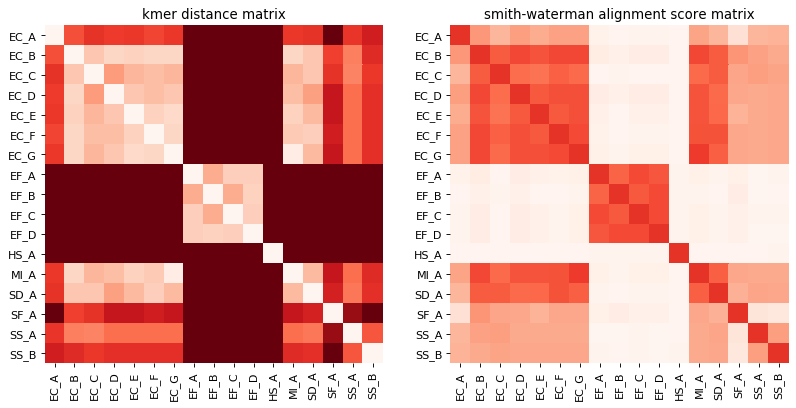

In [22]:
from utilities import heatmap
heatmap(kmer_distance_matrix, sw_alignment_distance_matrix)

Comment in the cell below why these two heatmaps look inverted relative to one another. <br>
Comment on the extent of similarity between the Smith-Waterman and k-mer distance approaches, and suggest which may be more appropriate for biological sequences, making references to some knowledge you have about genes. <br> 
(Maximum of 150 words)

 -- GRADED CELL (6 marks) - complete this cell --
 

### SECTION 2: CLUSTERING

From the heatmaps, it seems like there are a few clusters in the data. <br>
First, lets convert the pairwise distances to 2D coordinates. 
This is possible using Multidimensional scaling (MDS - which we will cover in a few weeks during lectures).
After we have transformed the distance matrix to 2D coordinates, we can plot it to see if any clusters are evident.

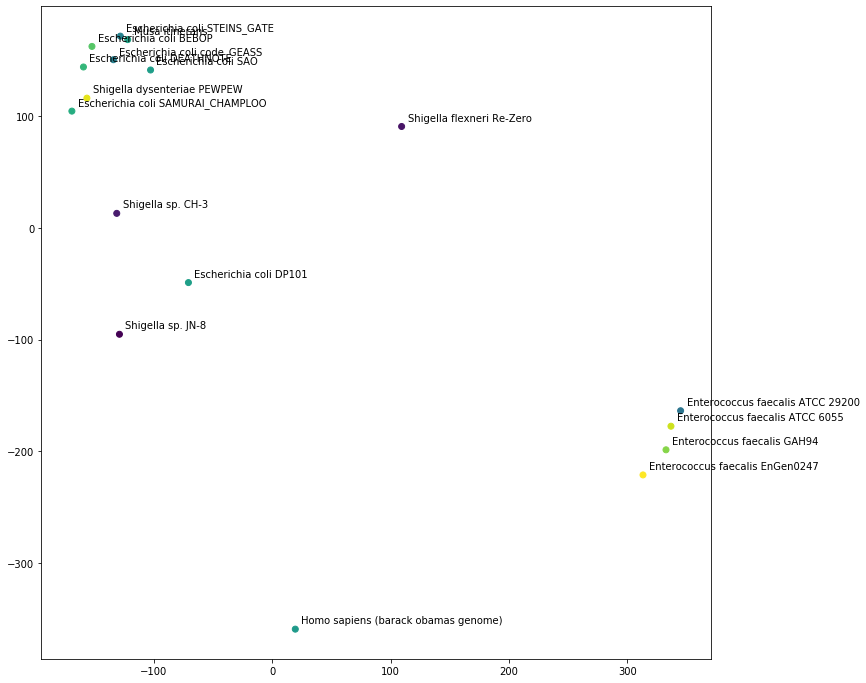

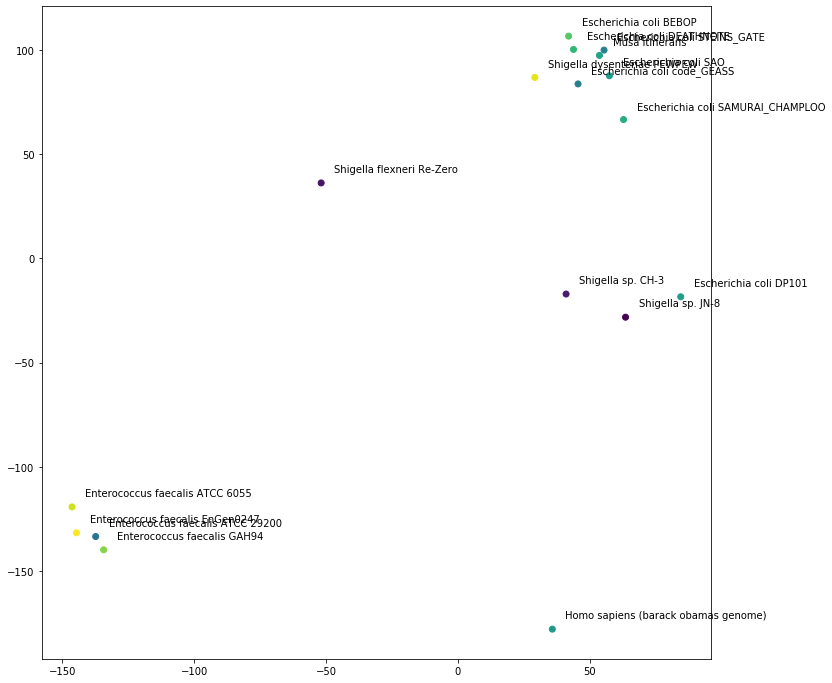

In [23]:
from utilities import mds_scatterplot, distance_matrix_to_coordinates_MDS
kmer_distances_xy = distance_matrix_to_coordinates_MDS(kmer_distance_matrix)
sw_distances_xy = distance_matrix_to_coordinates_MDS(sw_alignment_distance_matrix)
mds_scatterplot(kmer_distances_xy)
mds_scatterplot(sw_distances_xy)

Seems like there is some clustering happening. <br>
Let's use some clustering algorithms to define the clusters. 
in this manner, we can have an objective way to talk about the patterns in the data.

**TASK 4: K-means & K-medoids**
we are going to use K-means and K-medoids to cluster the data.

Let's implement the k-means algorithm. <br>
We have provided initialise_centroids, assign_points, and k-means. 
write a function which calculates new centroid locations (using the mean)

In [120]:
from utilities import initialise_centroids, average_point, assign_points, plot_kmeans, points_equal, euclidean_distance

In [121]:
# -- GRADED CELL (1 marks) - complete this cell --

def calculate_mean_centroids(data, assignments, k):
    # Given a list of points (data), and their corresponding cluster assignments (assignments), 
    # update our centroid locations by calculating the mean location of points for each cluster. 
    
    # Based on assignments list, put every points in its current cluster
    clusters = [[] for i in range(k)]
    for index, point in enumerate(data):
        point_assignment = assignments[index]
        clusters[point_assignment].append(point)
    
    # For every clusters, calculate its mean and put it inside centroids list
    centroids = []
    for index in range(len(clusters)):
        centroid = tuple(np.mean(np.array(clusters[index]), axis=0))
        centroids.append(centroid)
        
    return centroids

Place calculate_mean_centroids() in the kmeans function below to complete kmeans

In [122]:
# -- GRADED CELL (2 marks) - complete this cell --

def kmeans(data, k):
    # given a list of points (data) and num clusters = k, perform k-means clustering
    # Initialise all necessary variables
    previous_centroids = [(0,0) for i in range(k)]
    centroids = initialise_centroids(data, k)
    cluster_assignments = assign_points(centroids, data)
    
    while not points_equal(centroids, previous_centroids):
        # Use previous_centroids to detect changes
        previous_centroids = centroids
        # Assignment step
        cluster_assignments = assign_points(centroids, data)
        # Refitting step
        centroids = calculate_mean_centroids(data, cluster_assignments, k)
        # Plot the progress
        # plot_kmeans(data, centroids, cluster_assignments, k)
    
    return centroids, cluster_assignments

You can check your implementation using the cell below:

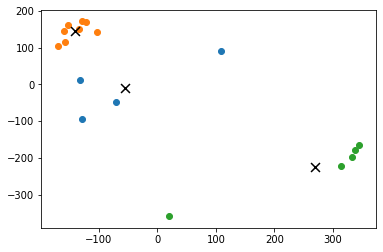

In [123]:
centroids, cluster_assignments = kmeans(kmer_distances_xy, 3)
plot_kmeans(kmer_distances_xy, centroids, cluster_assignments, 3)

Let's also implement k-medoids while we're at it. <br>
The only difference between k-means and k-medoids is the calculate_mean_centroids() step, which will instead be calculate_median_centroids()
the median can be taken here as the point in the cluster which has smallest cumulative distance to the other points in the cluster
You can use the provided euclidean_distance() function to calculate distances between points
write a function which calculates new centroid locations (using the median)

In [124]:
# -- GRADED CELL (3 marks) - complete this cell --

def calculate_median_centroids(data, assignments, k):
    # Given a list of points (data), and their corresponding cluster assignments (assignments), 
    # update our centroid locations by calculating the median point of each cluster.  
    
    # Based on assignments list, put every points in its current cluster
    clusters = [[] for i in range(k)]
    for index, point in enumerate(data):
        point_assignment = assignments[index]
        clusters[point_assignment].append(point)
        
    centroids = []
    for index in range(len(clusters)):
        points = clusters[index]
        points_len = len(points)
        # Just in case the cluster is empty, don't break the function and gracefully return (0,0)
        if points_len <= 0:
            centroid = (0,0)
        # If the cluster only contains one point, this point becomes the median
        elif points_len == 1:
            centroid = points[0]
        # When the cluster contains two or more points, calculate each cumulative distance
        # The point with the lowest cumulative becomes the median
        else:
            cumulative_distances = [0 for i in range(points_len)]
            for point_1 in range(0, points_len-1):
                for point_2 in range(point_1 + 1, points_len):
                    euclidean_dist = euclidean_distance(points[point_1], points[point_2])
                    cumulative_distances[point_1] += euclidean_dist
                    cumulative_distances[point_2] += euclidean_dist
            # If there are two or more points with the same cumulative distance, choose the first occurence
            min_index = np.argmin(np.array(cumulative_distances))
            centroid = points[min_index]
        centroids.append(centroid)
    
    return centroids


Place calculate_median_centroids() in the kmedoids function below to complete kmedoids

In [125]:
# -- GRADED CELL (1 marks) - complete this cell --

def kmedoids(data, k):
    # given a list of points (data) and num clusters = k, perform k-means clustering
    # Initialise all necessary variables
    previous_centroids = [(0,0) for i in range(k)]
    centroids = initialise_centroids(data, k)
    cluster_assignments = assign_points(centroids, data)
    
    while not points_equal(centroids, previous_centroids):
        # Use previous_centroids to detect changes
        previous_centroids = centroids
        # Assignment step
        cluster_assignments = assign_points(centroids, data)
        # Refitting step (calculate median instead of mean)
        centroids = calculate_median_centroids(data, cluster_assignments, k)
        # Plot the progress
        # plot_kmeans(data, centroids, cluster_assignments, k)
    
    return centroids, cluster_assignments

Here is another check cell, for kmedoids this time:

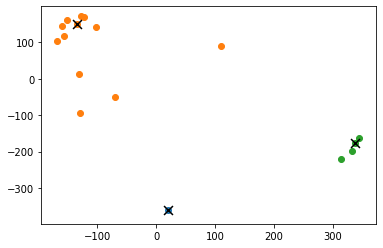

In [126]:
centroids, cluster_assignments = kmedoids(kmer_distances_xy, 3)
plot_kmeans(kmer_distances_xy, centroids, cluster_assignments, 3)

**TASK 5: silhouette analysis**<br>
It would be nice to have a way to objectively compare clustering performance. <br>
We could compare the selection of k (num clusters) to find the most optimal, or could compare different clustering algorithms to see which performs better. <br><br>

Silhouette analysis is one way to do this. 
Silhouette analysis reports information about how far a datapoint is from the clusters is isn't a part of.
It produces a plot where we can see the separation between clusters (higher is better) 
Silhouette coefficients are produced in the range [-1, 1], where 1 indicates the the point is far from other clusters, 0 represents a point which is near the decision boundary between two clusters, and negative values indicate that the point may have been assigned to the wrong cluster. 
more information is available at https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html<br><br>
The cell below gives a visual representation of the silhouette scores for points in each cluster. 



 KMEANS


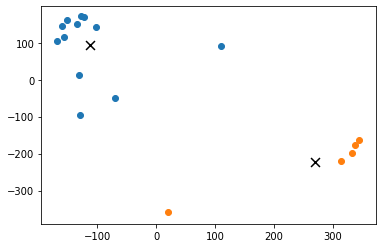

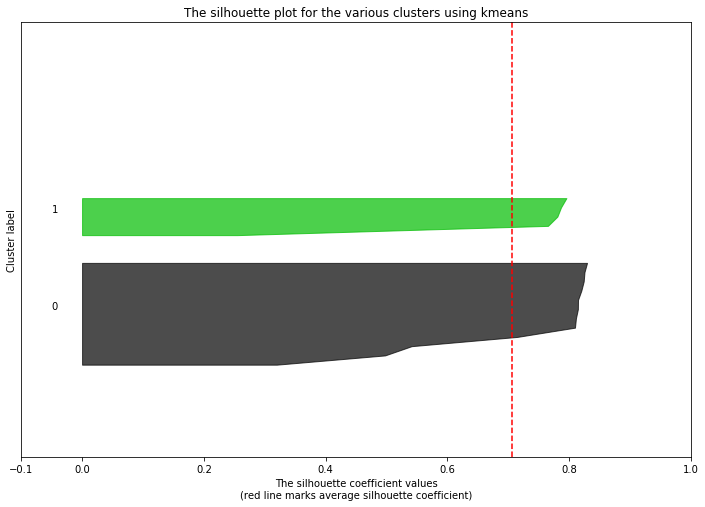



 KMEDOIDS


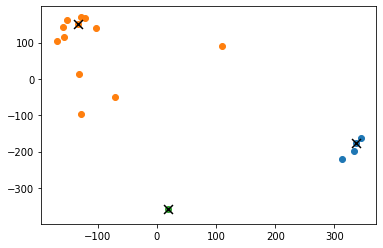

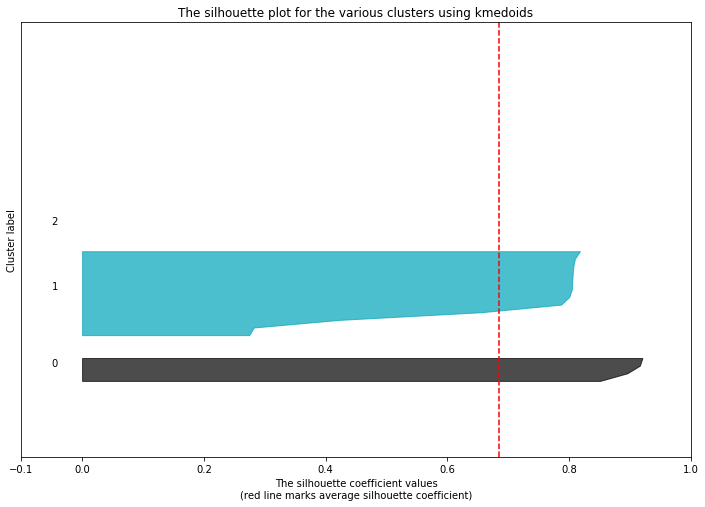

In [127]:
from utilities import silhouette_plot
print('\n\n KMEANS')
centroids, cluster_assignments = kmeans(kmer_distances_xy, 2)
plot_kmeans(kmer_distances_xy, centroids, cluster_assignments, 2)
silhouette_plot(kmer_distances_xy, cluster_assignments, 'kmeans')

print('\n\n KMEDOIDS')
centroids, cluster_assignments = kmedoids(kmer_distances_xy, 3)
plot_kmeans(kmer_distances_xy, centroids, cluster_assignments, 3)
silhouette_plot(kmer_distances_xy, cluster_assignments, 'kmedoids')

Let's get the silhouette scores for a run of kmeans and kmedoids. <br>
The average silhouette score for points in a cluster will be used as a metric to compare 
clustering performance (higher is better). <br>
The cell below will run k-means and k-mediods 10 times each and record average silhouette scores for each cluster. 
This will account for a range of starting centroid locations. 

In [128]:
from utilities import silhouette_score
def silhouette_score_run(distance_matrix, k):
    kmeans_scores = []
    kmedoids_scores = []

    while len(kmeans_scores) < 10:
        try:
            centroids, cluster_assignments = kmeans(distance_matrix, k)
            kmeans_scores.append(silhouette_score(distance_matrix, cluster_assignments))
        except ValueError:
            pass

    while len(kmedoids_scores) < 10:
        try:
            centroids, cluster_assignments = kmedoids(distance_matrix, k)
            kmedoids_scores.append(silhouette_score(distance_matrix, cluster_assignments))
        except ValueError:
            pass

    print('{:^15}{:^15}'.format('kmeans', 'kmedoids'))
    for score1, score2 in zip(kmeans_scores, kmedoids_scores):
        print('{:^15.2f}{:^15.2f}'.format(score1, score2))


print('\nsilhouette scores: k = 2')
silhouette_score_run(kmer_distances_xy, 2)
print('\nsilhouette scores: k = 3')
silhouette_score_run(kmer_distances_xy, 3)


silhouette scores: k = 2
    kmeans        kmedoids    
     0.29           0.71      
     0.71           0.71      
     0.71           0.71      
     0.71           0.71      
     0.71           0.71      
     0.71           0.71      
     0.71           0.71      
     0.71           0.71      
     0.71           0.71      
     0.71           0.71      

silhouette scores: k = 3
    kmeans        kmedoids    
     0.61           0.60      
     0.69           0.69      
     0.54           0.69      
     0.57           0.69      
     0.69           0.60      
     0.69           0.54      
     0.61           0.69      
     0.52           0.61      
     0.57           0.60      
     0.54           0.54      


In light of the silhouette analysis results produced above, we can make some objective judgement about our clustering. <br>
- Comment on which algorithm (k-means/k-medoids) performed better for k=2.
- Comment on what number of clusters, k=2 or k=3, produced better results. 
- Comment on why the silhouette scores are changing for each run of clustering. 
<br>
(Maximum of 150 words)

 -- GRADED CELL (5 marks) - complete this cell --
 
 

**TASK 6: Agglomerative clustering algorithm**

Previously, we have used partitional clustering algorithms on our data. The other main branch, hierarchical clustering has not been yet explored. 

Partitional and hierarchical clustering approaches perform differently given the dataset. Your task is to write **in plan english** an agglomerative hierarchical clustering algorithm. Be specific - the exact process of merging groups and the method used to calculate distance must be mentioned, as well as what is expected as input and output. 

Write your clustering algorithm in the markdown cell below.

 -- GRADED CELL (8 marks) - complete this cell --
 
 

Comment on which method, divisive or agglomerative, you think would be best given this dataset.

Use information from the kmer/smith-waterman distance heatmaps, the 2D scatterplot representation of the data, and silhouette analysis. Include a comment about outliers in your answer. 

Write your answer in the markdown cell below. 

 -- GRADED CELL (5 marks) - complete this cell --
 
 